# 🏏 IPL Playoff Qualification Probability Analysis  
## 📊 Can You Make the Playoffs Without Winning 3 Matches in a Row?

In the IPL league stage, each team plays 14 matches. Reaching **14 points (7 wins)** is often seen as the minimum threshold to stay in the playoff race — but it's not a guarantee. Unless a team has a favorable **Net Run Rate (NRR)**, even 7 wins can fall short. On the other hand, **8 wins (16 points)** is typically a safe ticket to the playoffs.

But here's the twist — **what if a team is never allowed to win more than 2 matches in a row**?  
This notebook explores that exact constraint:  
> 🔁 How often can teams qualify if they’re not allowed to build long winning streaks?

We break this down using two approaches:

### 🧮 1. Pure Combinatorics
We start with a mathematical baseline: each match is a fair coin toss — a 50-50 win/loss scenario. This helps us understand how many valid qualification paths exist under the streak constraint.

### 🧪 2. Realistic Simulations
Next, we simulate IPL campaigns with more **realistic win probabilities**:
- **Weak Teams (40%)** – inconsistent underdogs (e.g., PBKS 😅)
- **Standard Teams (50%)** – the average IPL squad (e.g., RR)
- **Strong Teams (60%)** – dominant forces who create momentum (e.g., MI)

📌 For example, a team like **Mumbai Indians (MI)** might begin a season with a ~60% chance of winning any given match — about 10% more than an average team like **Rajasthan Royals**, and roughly 20% more than a struggling side like **RCB** (just kidding... or are we? 😄)

---

This notebook combines mathematical insight, probability modeling, and real campaign examples to explore a core question:
> "Can a team qualify (or win) the IPL **without ever building real momentum** at some stage in the group stage?"
)
### 🧮 Playoff Qualification with 7 vs 8+ Wins (IPL 2008–2024)

Based on real IPL data:

| Win Count | Qualified | Missed |
|-----------|-----------|--------|
| **7 Wins** | 4 teams   | 3 teams |
| **8+ Wins** | 24 teams  | 0 teams |

📌 Teams with **exactly 7 wins** have a 57% chance to qualify — often relying on **Net Run Rate (NRR)**.

✅ Teams with **8 or more wins** have **always qualified**, making it the safer benchmark for playoff success.


## Imports and Setup

In [1]:
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import random
import plotly.graph_objects as go


## Parameters and Helper Functions

In [2]:
TOTAL_MATCHES = 14
QUALIFY_WIN_THRESHOLD = 7
STRICT_QUALIFY_THRESHOLD = 8

def is_valid_sequence(seq):
    """Return True if sequence has no more than 2 consecutive wins."""
    count = 0
    for outcome in seq:
        if outcome == 'W':
            count += 1
            if count > 2:
                return False
        else:
            count = 0
    return True

def count_wins(seq):
    return seq.count('W')

## Equally strong teams vs Simulation of Weak,Standard & Strong team

In [3]:
all_sequences = list(itertools.product(['W', 'L'], repeat=TOTAL_MATCHES))
valid_sequences = [seq for seq in all_sequences if is_valid_sequence(seq)]

qualifying_7plus = [seq for seq in valid_sequences if count_wins(seq) >= QUALIFY_WIN_THRESHOLD]
qualifying_8plus = [seq for seq in valid_sequences if count_wins(seq) >= STRICT_QUALIFY_THRESHOLD]

print(f"Total sequences: {len(all_sequences)}")
print(f"Valid sequences (no >2 consecutive wins): {len(valid_sequences)}")
print(f"Qualifying sequences (7+ wins): {len(qualifying_7plus)}")
print(f"Strict qualifying sequences (8+ wins): {len(qualifying_8plus)}")

Total sequences: 16384
Valid sequences (no >2 consecutive wins): 5768
Qualifying sequences (7+ wins): 1424
Strict qualifying sequences (8+ wins): 408


### Win Distribution in Valid Sequences

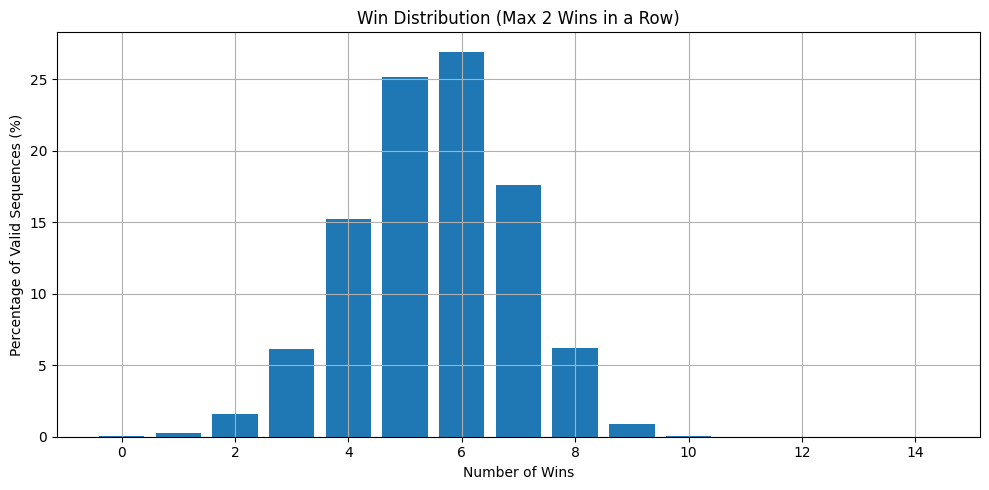

In [4]:
win_distribution = {i: 0 for i in range(15)}
for seq in valid_sequences:
    win_distribution[count_wins(seq)] += 1

win_df = pd.DataFrame(list(win_distribution.items()), columns=['Wins', 'Valid Sequence Count'])
win_df['Percentage'] = (win_df['Valid Sequence Count'] / len(valid_sequences)) * 100

plt.figure(figsize=(10, 5))
plt.bar(win_df['Wins'], win_df['Percentage'])
plt.xlabel('Number of Wins')
plt.ylabel('Percentage of Valid Sequences (%)')
plt.title('Win Distribution (Max 2 Wins in a Row)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Section 2: Simulated Seasons

In this analysis, we simulate the performance of a single team (categorized as weak, average, or strong) based on fixed win probabilities (e.g., 40%, 50%, or 60%) for each match. However, this approach assumes that the outcomes of other teams’ matches are independent and not explicitly modeled. It does not account for the fact that in a real tournament, each match has two teams and only one winner, meaning all match results are interconnected. Therefore, this model does not simulate the full league dynamics or account for how other teams' performances impact playoff qualification. It provides an isolated view of a team's qualification likelihood under win-streak constraints, but does not reflect the complexity of actual tournament scenarios where mutual exclusivity, matchups, and net run rate all influence outcomes.

## 📊 What Do The Numbers Say?

Now that we’ve seen how hard it is to build momentum under the streak constraint,
let’s look at how often different types of teams (weak, average, strong) can still qualify:


In [5]:
def simulate_with_prob(p_win, total_matches=14, num_simulations=10000):
    seven_only, seven_plus = 0, 0

    for _ in range(num_simulations):
        seq = []
        win_streak = 0
        for _ in range(total_matches):
            if win_streak == 2:
                seq.append('L')
                win_streak = 0
            else:
                outcome = 'W' if random.random() < p_win else 'L'
                seq.append(outcome)
                win_streak = win_streak + 1 if outcome == 'W' else 0
        wins = seq.count('W')
        if wins >= 7:
            seven_plus += 1
        if wins == 7:
            seven_only += 1

    return round(seven_only / num_simulations * 100, 2), round(seven_plus / num_simulations * 100, 2)

# Run for 3 types of teams
results = {}
for label, p in zip(['Weak (40%)', 'Average (50%)', 'Strong (60%)'], [0.4, 0.5, 0.6]):
    q7_only, q7_plus = simulate_with_prob(p)
    results[label] = {'7 Wins Only': q7_only, '7+ Wins': q7_plus}
    print(f"{label}: 7 Wins Only = {q7_only}%, 7+ Wins = {q7_plus}%")

Weak (40%): 7 Wins Only = 12.64%, 7+ Wins = 16.85%
Average (50%): 7 Wins Only = 24.52%, 7+ Wins = 40.64%
Strong (60%): 7 Wins Only = 31.31%, 7+ Wins = 68.14%


✅ Simulated 68.2% chance for Strong team (7+ wins) → This suggests ~7 in 10 strong campaigns can break through even with limited streaks.

Weak Team (40%): 2-Match Streak in 83.05% of 10000 seasons.
Weak Team (40%): 3-Match Streak in 41.43% of 10000 seasons.
Standard Team (50%): 2-Match Streak in 94.07% of 10000 seasons.
Standard Team (50%): 3-Match Streak in 64.51% of 10000 seasons.
Strong Team (60%): 2-Match Streak in 98.42% of 10000 seasons.
Strong Team (60%): 3-Match Streak in 82.35% of 10000 seasons.


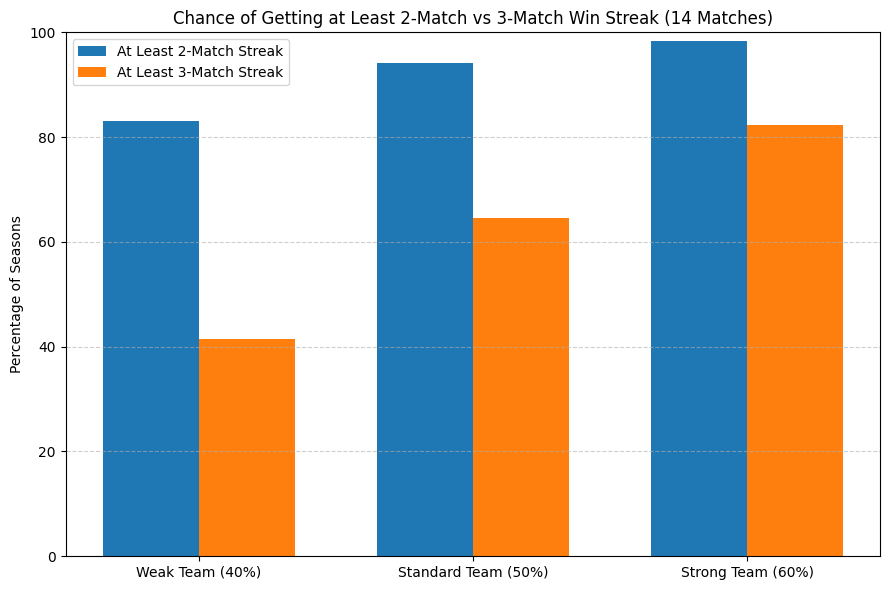

In [6]:
import matplotlib.pyplot as plt
import random

# === TASK 1: Helper to check for n-match win streak ===
def has_n_win_streak(seq, n):
    """
    Checks if a sequence contains at least one n-match win streak.
    """
    streak = 0
    for outcome in seq:
        if outcome == 'W':
            streak += 1
            if streak >= n:
                return True
        else:
            streak = 0
    return False

# === TASK 2: Simulate for multiple win probabilities and streak lengths ===
def compare_streak_levels(win_probs, streak_lengths=[2, 3], total_matches=14, simulations=10000):
    """
    Compares the probability of achieving different streak lengths (2 and 3 matches)
    across teams with varying base win probabilities.

    Returns:
    - Dictionary: {team_label: {streak_type: percentage}}
    """
    results = {}
    team_labels = ['Weak Team (40%)', 'Standard Team (50%)', 'Strong Team (60%)']

    for label, p_win in zip(team_labels, win_probs):
        results[label] = {}
        for n in streak_lengths:
            count_with_streak = 0
            for _ in range(simulations):
                seq = ['W' if random.random() < p_win else 'L' for _ in range(total_matches)]
                if has_n_win_streak(seq, n):
                    count_with_streak += 1
            percent = round((count_with_streak / simulations) * 100, 2)
            results[label][f"{n}-Match Streak"] = percent
            print(f"{label}: {n}-Match Streak in {percent}% of {simulations} seasons.")
    return results

# === TASK 3: Run the comparison simulation ===
win_probs = [0.4, 0.5, 0.6]  # Weak, Standard, Strong
streak_comparison = compare_streak_levels(win_probs, streak_lengths=[2, 3])

# === TASK 4: Visualize ===
labels = list(streak_comparison.keys())
streak_2 = [streak_comparison[l]['2-Match Streak'] for l in labels]
streak_3 = [streak_comparison[l]['3-Match Streak'] for l in labels]

plt.figure(figsize=(9, 6))
bar_width = 0.35
x = range(len(labels))

plt.bar(x, streak_2, width=bar_width, label='At Least 2-Match Streak', color="#1f77b4")
plt.bar([i + bar_width for i in x], streak_3, width=bar_width, label='At Least 3-Match Streak', color="#ff7f0e")

plt.xticks([i + bar_width / 2 for i in x], labels)
plt.ylabel("Percentage of Seasons")
plt.title("Chance of Getting at Least 2-Match vs 3-Match Win Streak (14 Matches)")
plt.ylim(0, 100)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 📊 How Often Do Teams Build Winning Streaks?

| Team Type        | 2-Match Streak | 3-Match Streak |
|------------------|----------------|----------------|
| Weak (40%)       | ~8.3/10 seasons| ~4.3/10 seasons|
| Standard (50%)   | ~9.4/10 seasons| ~6.5/10 seasons|
| Strong (60%)     | ~9.8/10 seasons| ~8.3/10 seasons|

🧠 Stronger teams build long streaks more often.  
📉 Without a 3-match win streak, reaching 8+ wins (and playoffs) is highly unlikely.


"Restricting teams to no more than 2-match win streaks disproportionately hurts playoff chances — especially for average or weak teams."

### 🔥 Can You Qualify Without Long Winning Streaks?

Let's assume a team plays a full 14-match league season but is restricted to **never winning more than 2 matches in a row**.

Here's what happens:

- They **cannot build big momentum** (e.g., WWW is illegal)
- The team is forced to reset after every pair of wins — e.g., W-W-L-W-W-L...
- Even if they play "above average", their total points will likely hover around 7–8

📉 In such a constrained pattern:
- Just **one extra bad game** (from 7 wins to 6) knocks them out of contention
- Even **with 7 wins**, they rely on **Net Run Rate (NRR)** or other results
- No IPL team has ever won the title with such **limited momentum**



In [7]:
# === Example Path Generation Under 2-Win Streak Constraint ===
def generate_valid_sequence(target_wins=7, total_matches=14):
    """
    Generates a random sequence with max 2-match win streaks and exactly target_wins.
    """
    import random

    while True:
        seq = []
        wins = 0
        streak = 0
        for _ in range(total_matches):
            if streak == 2:
                seq.append('L')
                streak = 0
            else:
                if wins < target_wins and random.random() < 0.6:
                    seq.append('W')
                    wins += 1
                    streak += 1
                else:
                    seq.append('L')
                    streak = 0
        if wins == target_wins:
            return seq

example_seq = generate_valid_sequence(7)
print("Example Max 2-Streak Campaign (7 Wins):", ' '.join(example_seq))


Example Max 2-Streak Campaign (7 Wins): W W L L W W L W W L W L L L


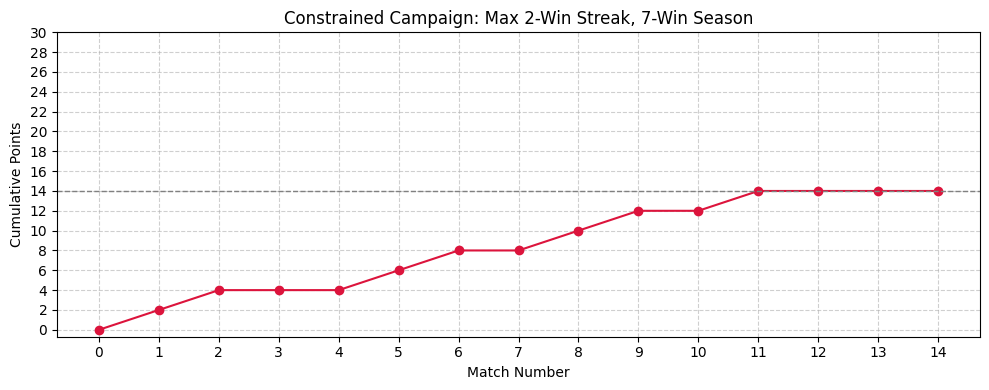

In [8]:
# Visualize the sequence
import matplotlib.pyplot as plt

points = [0]
for match in example_seq:
    points.append(points[-1] + (2 if match == 'W' else 0))

plt.figure(figsize=(10, 4))
plt.plot(range(15), points, marker='o', color='crimson')
plt.axhline(y=14, color='gray', linestyle='--', linewidth=1)
plt.xticks(range(15))
plt.yticks(range(0, 31, 2))
plt.title("Constrained Campaign: Max 2-Win Streak, 7-Win Season")
plt.xlabel("Match Number")
plt.ylabel("Cumulative Points")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


🧠 This is how a “no momentum” season looks.

Even when the team manages 7 wins, there are **multiple cold stretches**.

Compare this with dominant campaigns (e.g., GT 2022, MI 2020) — they rise steeply due to long streaks.



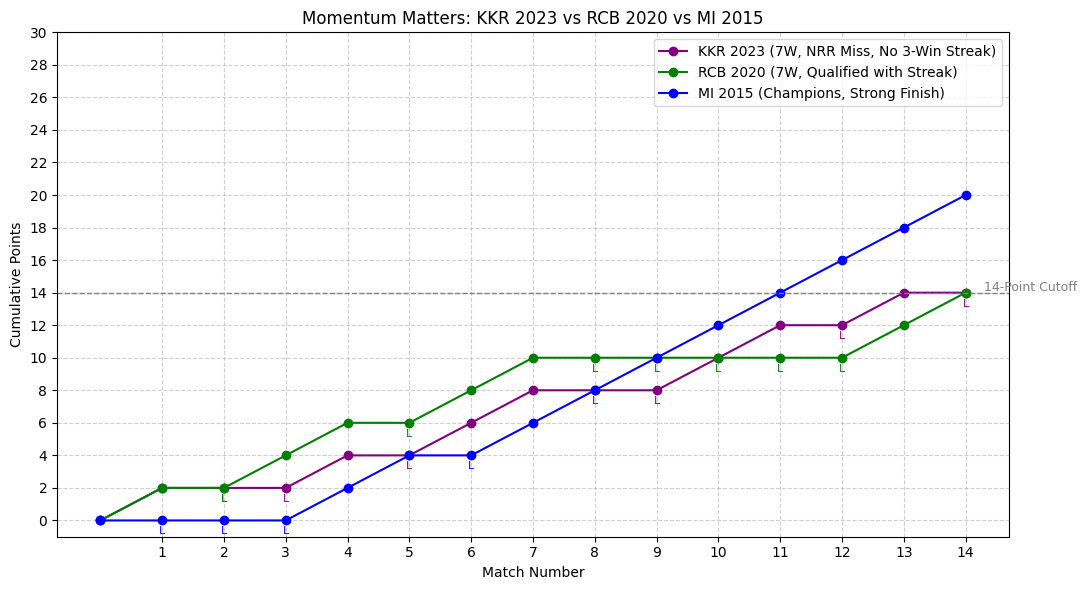

In [9]:
# === Team 1: KKR 2023 (7 wins, failed to qualify due to NRR, no 3+ win streaks) ===
kkr_2023 = ['W', 'L', 'L', 'W', 'L', 'W', 'W', 'L', 'L', 'W', 'W', 'L', 'W', 'L']
kkr_points = [0]
for result in kkr_2023:
    kkr_points.append(kkr_points[-1] + (2 if result == 'W' else 0))

# === Team 2: RCB 2020 (7 wins, qualified due to strong NRR and 3+ win streak) ===
rcb_2020 = ['W', 'L', 'W', 'W', 'L', 'W', 'W', 'L', 'L', 'L', 'L', 'L', 'W', 'W']
rcb_points = [0]
for result in rcb_2020:
    rcb_points.append(rcb_points[-1] + (2 if result == 'W' else 0))

# === Team 3: MI 2015 (Strong finish, won IPL) ===
mi_2015 = ['L', 'L', 'L', 'W', 'W', 'L', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']
mi_points = [0]
for result in mi_2015:
    mi_points.append(mi_points[-1] + (2 if result == 'W' else 0))

# === Plotting ===
plt.figure(figsize=(11, 6))
plt.plot(range(15), kkr_points, marker='o', color='purple', label='KKR 2023 (7W, NRR Miss, No 3-Win Streak)')
plt.plot(range(15), rcb_points, marker='o', color='green', label='RCB 2020 (7W, Qualified with Streak)')
plt.plot(range(15), mi_points, marker='o', color='blue', label='MI 2015 (Champions, Strong Finish)')

# Highlight losses
for i, (kkr_r, rcb_r, mi_r) in enumerate(zip(kkr_2023, rcb_2020, mi_2015)):
    if kkr_r == 'L':
        plt.annotate('L', (i+1, kkr_points[i+1]), textcoords="offset points", xytext=(0, -10),
                     ha='center', color='purple', fontsize=8)
    if rcb_r == 'L':
        plt.annotate('L', (i+1, rcb_points[i+1]), textcoords="offset points", xytext=(0, -10),
                     ha='center', color='green', fontsize=8)
    if mi_r == 'L':
        plt.annotate('L', (i+1, mi_points[i+1]), textcoords="offset points", xytext=(0, -10),
                     ha='center', color='blue', fontsize=8)

# Add 14-point cutoff line
plt.axhline(y=14, color='gray', linestyle='--', linewidth=1)
plt.text(14.3, 14.1, '14-Point Cutoff', color='gray', fontsize=9)

# Final touches
plt.title("Momentum Matters: KKR 2023 vs RCB 2020 vs MI 2015")
plt.xlabel("Match Number")
plt.ylabel("Cumulative Points")
plt.xticks(range(1, 15))
plt.yticks(range(0, 31, 2))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 🔥 Momentum Defines Playoff Fate: A Comparative Campaign Study

This plot compares three IPL campaigns that highlight how **winning streaks (momentum)** affect playoff qualification:

- 🟣 **KKR 2023**: Finished with **7 wins** but never won more than **2 matches in a row**. They failed to qualify due to **Net Run Rate (NRR)**, showing how lack of streaks leaves teams vulnerable.
  
- 🟢 **RCB 2020**: Also finished with **7 wins**, but had an **early 3-match win streak**. Despite late losses, they qualified thanks to the **early momentum**, which boosted their NRR.

- 🔵 **MI 2015**: Started the season poorly with 3 straight losses, but recovered with a **massive win streak** to not only qualify but go on to **win the IPL title**. A textbook example of peaking at the right time.


# 🎯 Equally Strong Teams vs Real-Life Scenarios

This simulation compares two models of IPL team performance under a constraint of **no more than 2 consecutive wins** in a 14-match season:

1. **Math Model**: All teams are equally strong. Each match has a 50% chance of being won.
2. **Simulation Model**: Teams are categorized as Weak (40%), Average (50%), and Strong (60%) win probabilities.
This sets up the next comparison: **what % of teams actually reach 7 or 8 wins** under this restriction.
We analyze:
- ✅ The probability of getting **exactly 7 wins**
- ✅ The probability of getting **7 or more wins**


In [10]:
def simulate_with_prob(
    p_win,
    total_matches=14,
    qualify_threshold=7,
    max_win_streak=2,
    num_simulations=10000
):
    """
    Simulates an IPL season for a team constrained by a max win streak.

    Parameters:
    - p_win: float, team's probability of winning a match
    - total_matches: int, number of league matches (default: 14)
    - qualify_threshold: int, exact number of wins to track (default: 7)
    - max_win_streak: int, max allowed consecutive wins (default: 2)
    - num_simulations: int, number of seasons to simulate

    Returns:
    - Tuple: (% of exactly 7 wins, % of 7 or more wins)
    """
    seven_only, seven_plus = 0, 0

    for _ in range(num_simulations):
        seq = []
        win_streak = 0
        for _ in range(total_matches):
            if win_streak == max_win_streak:
                seq.append('L')
                win_streak = 0
            else:
                outcome = 'W' if random.random() < p_win else 'L'
                seq.append(outcome)
                win_streak = win_streak + 1 if outcome == 'W' else 0
        wins = seq.count('W')
        if wins >= qualify_threshold:
            seven_plus += 1
        if wins == qualify_threshold:
            seven_only += 1

    return round(seven_only / num_simulations * 100, 2), round(seven_plus / num_simulations * 100, 2)

In [11]:
# Define team profiles with their win probabilities
team_profiles = {
    "Weak (40%)": 0.4,
    "Average (50%)": 0.5,
    "Strong (60%)": 0.6
}

# Store results
results = {}
for label, prob in team_profiles.items():
    q7_only, q7_plus = simulate_with_prob(p_win=prob)
    results[label] = {'7 Wins Only': q7_only, '7+ Wins': q7_plus}
    print(f"{label}: 7 Wins Only = {q7_only}%, 7+ Wins = {q7_plus}%")


Weak (40%): 7 Wins Only = 12.34%, 7+ Wins = 17.0%
Average (50%): 7 Wins Only = 24.96%, 7+ Wins = 40.0%
Strong (60%): 7 Wins Only = 30.62%, 7+ Wins = 67.88%


In [12]:
# Extract data
labels = list(results.keys())
sim_7only = [results[l]['7 Wins Only'] for l in labels]
sim_7plus = [results[l]['7+ Wins'] for l in labels]

# Math model reference values
comb_7plus = [8.69] * len(labels)          # All 7+ wins (math model)
comb_7only = [6.2] * len(labels)           # 7 wins only = 8.69 - 2.49

# Create the plot
fig = go.Figure()

# Math Model Bars
fig.add_trace(go.Bar(x=labels, y=comb_7only, name='7 Wins Only (Math Model)', marker_color='#7eb6ff'))
fig.add_trace(go.Bar(x=labels, y=comb_7plus, name='7+ Wins (Math Model)', marker_color='#007acc'))

# Simulation Bars
fig.add_trace(go.Bar(x=labels, y=sim_7only, name='7 Wins Only (Simulated)', marker_color='#ffd78f'))
fig.add_trace(go.Bar(x=labels, y=sim_7plus, name='7+ Wins (Simulated)', marker_color='#ff8c00'))

# Layout
fig.update_layout(
    barmode='group',
    title='🏏 Playoff Qualification: Equally Strong Teams vs Real-Life Scenarios',
    xaxis_title='Team Strength',
    yaxis_title='Qualification Probability (%)',
    legend_title='Outcome',
    height=600
)

fig.show()



📌 **Conclusion**: Winning streaks are not just cosmetic — they directly impact qualification odds, impact of winning margins owing to NRR , and playoff scenarios. A team without 3+ winning streak momentum atleast once in group stage must rely on others’ failures. Momentum builders create their own destiny. Qualification and championship runs are driven by winning streaks — teams relying only on scattered wins have slim margins and little playoff certainty.
